# Questão 2.

Utilize uma rede neural perceptron de múltiplas camadas para aproximar a função analítica abaixo.

$f(x_1,x_2) = x_1^2+x_2^2+x_1x_2+cos(x_1+x_2)-1, |x_1|\leq5, |x_2|\leq5$  

Com base na função gere o conjunto de treinamento e de teste. Defina a arquitetura da rede
e a realize o treinamento. Apresente um gráfico com a curva da função analítica e a curva
da função aproximada pela rede neural. Apresente também a curva da função custo no treinamento e a curva do erro médio quadrado com relação ao o conjunto de validação. Procure
definir a arquitetura da rede neural perceptron, isto é, o número de entradas, o número de
neurônios em cada camada e o número de neurônios camada de saída.

Observação. Como se trata de um problema de aproximação de funções, considere a camada de saída do tipo linear puro.

## Imports das bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Geração de dados

In [10]:
# Gerar dados
x1 = np.linspace(-5, 5, 250)
x2 = np.linspace(-5, 5, 250)
X1, X2 = np.meshgrid(x1, x2)
Y = X1**2 + X2**2 + 2*X1*X2 + np.cos(X1 + X2) - 1

# "Achatando" os dados para o treinamento
X = np.vstack([X1.ravel(), X2.ravel()]).T
y = Y.ravel()

## Divisão dos dados de treino, dados de teste e definição da arquitetura da rede neural

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
)

# Treinando o modelo e guardando a função custo de validação em cada iteração
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 125.2366 - val_loss: 0.2432
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1287 - val_loss: 0.0374
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0647 - val_loss: 0.0861
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0719 - val_loss: 0.0511
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0772 - val_loss: 0.0318
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0493 - val_loss: 0.0602
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1965 - val_loss: 0.0406
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0440 - val_loss: 0.0438
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0857 - val_loss: 0.0129
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0511 - val_loss: 0.0364
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0309 - val_loss: 0.0200
Epoch 12/50
1563/1563 ━━━━━━━━━━━━━━━━━

## Plot das funções (original e aproximada)

1954/1954 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Text(0.5, 0.92, 'Função aproximada pela rede neural MLP')

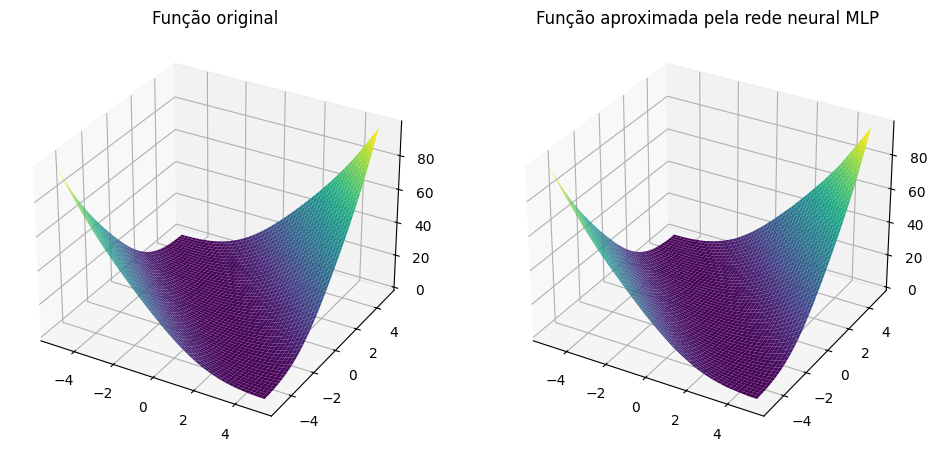

In [20]:
# Predições
y_pred = model.predict(X)

fig = plt.figure(figsize=(18, 6))

# plot da função original
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(X1, X2, Y, cmap='viridis')
ax.set_title('Função original')

# plot da função aproximação pela MLP
Y_pred = y_pred.reshape(X1.shape)
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(X1, X2, Y_pred, cmap='viridis')
ax.set_title('Função aproximada pela rede neural MLP')

## Plot do custo durante o treinamento e validação

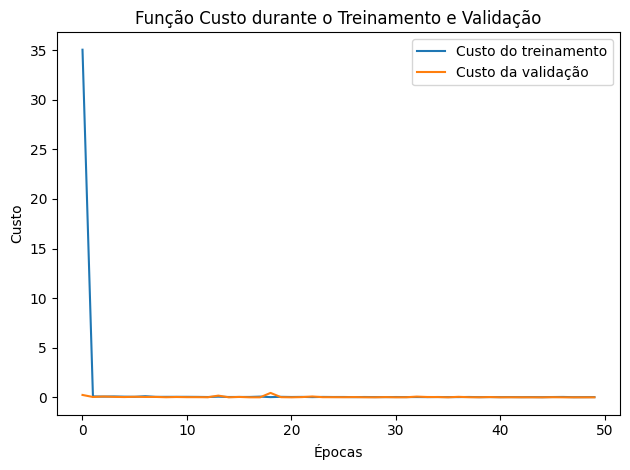

In [24]:
plt.figure()
plt.plot(history.history['loss'], label='Custo do treinamento')
plt.plot(history.history['val_loss'], label='Custo da validação')
plt.legend()
plt.title('Função Custo durante o Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')

plt.tight_layout()
plt.show()

## Plot do erro médio quadrático

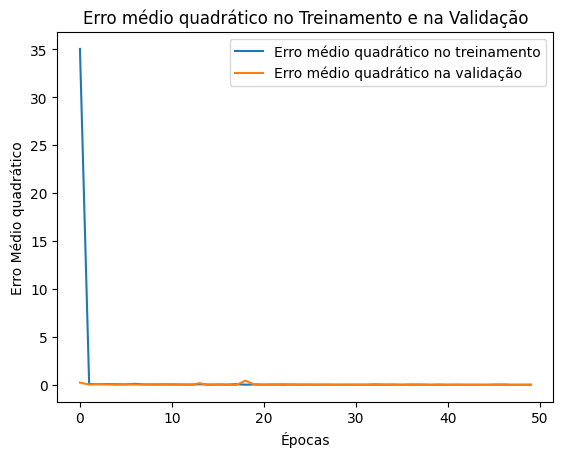

In [25]:
plt.figure()
plt.plot(history.history['loss'], label='Erro médio quadrático no treinamento')
plt.plot(history.history['val_loss'], label='Erro médio quadrático na validação')
plt.legend()
plt.title('Erro médio quadrático no Treinamento e na Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio quadrático')
plt.show()
